In [1]:
import torch
from kymatio.torch import Scattering1D
import numpy as np
import pandas as pd
# import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def get_feature_vector(data, J, g):
    T = np.max(data.shape)
    scattering = Scattering1D(J, T, 1)

    meta = scattering.meta()
    order0 = np.where(meta['order'] == 0)
    order1 = np.where(meta['order'] == 1)
    order2 = np.where(meta['order'] == 2)

    use_cuda = torch.cuda.is_available()
    if use_cuda:
      scattering.cuda()
      data = data.cuda()
    
    sx1 = scattering.forward(data)
    if use_cuda:
      sx1 = sx1.cpu()

    sx  = sx1.numpy()
    
    log_eps = 1e-8
    sx = np.power(np.abs(sx)+log_eps, g)

    
    return sx

In [3]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)


In [4]:
use_cuda = torch.cuda.is_available()
if use_cuda:
  print('Using cuda...')
else:
  print('Not using cuda')

data = pd.read_csv('signals_saar.csv', header=None)
data = data.to_numpy().T
data.shape

data = torch.tensor(data)
L = data.shape[1]
# Chop signals
T = 2 ** 14
data = data[:, int(L / 2 - T / 2):int(L / 2 + T / 2)]
data = data.contiguous()
data = data.type(dtype=torch.float32)

Not using cuda


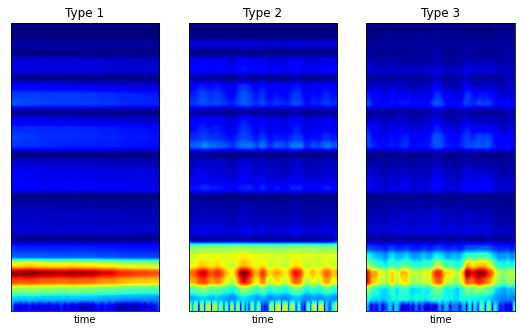

In [5]:
X1 = get_feature_vector(data[27,:], 7, 0.5)
X2 = get_feature_vector(data[15,:], 7, 0.5)
X3 = get_feature_vector(data[58,:], 7, 0.5)
fig, axs = plt.subplots(1, 3)
axs[0].imshow(X1, origin = 'lower', aspect = 'auto', cmap = 'jet')#, interpolation= 'spline36', cmap='viridis')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title('Type 1')
axs[0].set_xlabel('time')

axs[1].imshow(X2, origin = 'lower', aspect = 'auto', cmap = 'jet')#, interpolation= 'spline36', cmap='viridis')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title('Type 2')
axs[1].set_xlabel('time')

axs[2].imshow(X3, origin = 'lower', aspect = 'auto', cmap = 'jet')#, interpolation= 'spline36', cmap='viridis')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_title('Type 3')
axs[2].set_xlabel('time')

set_size(7,4)
plt.savefig('figures/scattering_coeff_examples/st_coeffs.pdf',bbox_inches='tight')